In [2]:
# Ensure you have OLLaMA and LLaMAIndex installed. If not, run these commands:
# %pip install llama-index-llms-ollama
# !pip install llama-index

from llama_index.llms.ollama import Ollama

# Initialize OLLaMA with the model you intend to use
llm = Ollama(model="mistral", request_timeout=30.0)

# Use the 'complete' method to send your prompt to the model
prompt = "Tell me about the battle of Boyne in 100 words"
response_Mistral_Boyne = llm.complete(prompt)

# Print the response from the model
print(response_Mistral_Boyne)


 The Battle of the Boyne, fought on July 1, 1690, was a significant military engagement between the forces of King William III of England and his Dutch allies, and those of his estranged father-in-law, King James II and VII of Scotland and England. The battle took place near the River Boyne in County Meath, Ireland. King William's superior strategy, better discipline, and larger, more modern army led to a decisive victory for him. James II was forced to retreat, marking the end of his attempt to regain the English and Irish thrones. The Battle of the Boyne is commemorated annually by Protestant Orangemen with parades in Northern Ireland.


In [1]:
import ragas 

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Battle of Boyne Reference Answers generation 

In [35]:
reference_Boyne = "The Battle of the Boyne, fought on July 1, 1690, near the River Boyne in Ireland, was a pivotal moment in Irish, British, and European history. This conflict was between the deposed King James II of England and Scotland, who had the support of Catholic France, and the Dutch Prince William of Orange, who had ascended to the English throne. William's victory ensured the continued Protestant ascendancy in Ireland. The battle is celebrated for its impact on maintaining Protestant power in England and has deep cultural significance, particularly in Northern Ireland, symbolizing the triumph of Protestantism. Engaging thousands of troops, it was more than a mere military engagement; it shaped the course of British and Irish history."
reference_Hastings ="The Battle of Hastings, fought on October 14, 1066, was a pivotal moment in English history. It took place between the Norman-French army of William, the Duke of Normandy, and an English army under the Anglo-Saxon King Harold Godwinson, who had been crowned king earlier that year. The battle occurred because William claimed the English throne, asserting that Harold had previously sworn to support his claim. The conflict saw Harold's forces defeated after a day-long fight. Harold was killed, leading to William's ascension to the English throne, subsequently known as William the Conqueror. This victory initiated the Norman conquest of England, profoundly altering the country's culture, language, and governance."
reference_Waterloo ="The Battle of Waterloo, fought on June 18, 1815, near Waterloo in present-day Belgium, marked the end of Napoleon Bonaparte's rule as Emperor of the French and his Hundred Days' return from exile. This decisive battle involved the French army under Napoleon and two armies of the Seventh Coalition: a British-led allied army under the Duke of Wellington and a Prussian army under Gebhard Leberecht von Blücher. Despite initial successes, Napoleon's forces were overwhelmed by the coalition armies' superior numbers and coordination. The defeat at Waterloo led to Napoleon's abdication and exile to Saint Helena, where he died in 1821. Waterloo ended 23 years of recurrent warfare between France and other powers in Europe."

The question: Tell me about the battle of Boyne in 100 words

Metrics for Response_experiment1_llama2:
BLEU Score: 0.12386004243528552
ROUGE Scores: {'rouge1': Score(precision=0.6559139784946236, recall=0.5169491525423728, fmeasure=0.5781990521327014), 'rouge2': Score(precision=0.2608695652173913, recall=0.20512820512820512, fmeasure=0.22966507177033493), 'rougeL': Score(precision=0.3763440860215054, recall=0.2966101694915254, fmeasure=0.33175355450236965)}
TER Score: 72.64957264957265
Cosine Similarities: [0.73370723]

Metrics for Response_experiment1_mistral:
BLEU Score: 0.17066708838289743
ROUGE Scores: {'rouge1': Score(precision=0.5961538461538461, recall=0.5254237288135594, fmeasure=0.5585585585585586), 'rouge2': Score(precision=0.27184466019417475, recall=0.23931623931623933, fmeasure=0.2545454545454545), 'rougeL': Score(precision=0.3942307692307692, recall=0.3474576271186441, fmeasure=0.3693693693693693)}
TER Score: 73.50427350427351
Cosine Similarities: [0.73412184]

Metrics fo

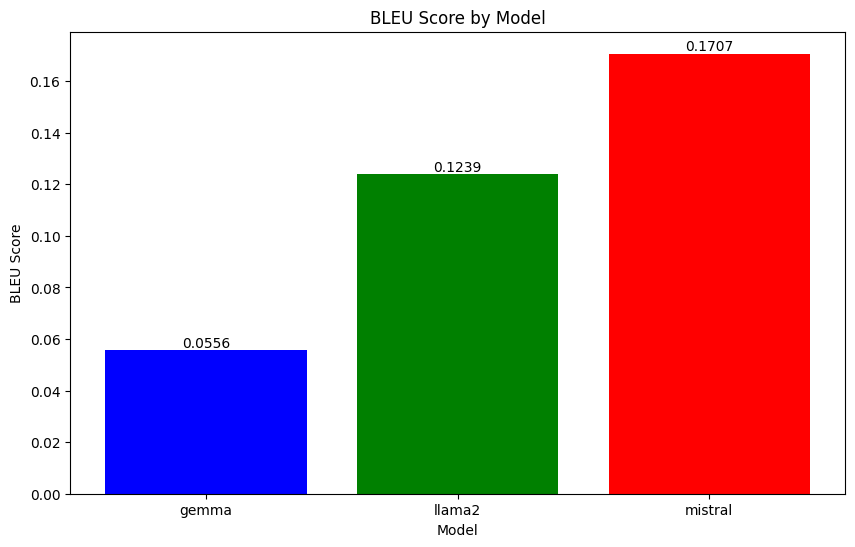

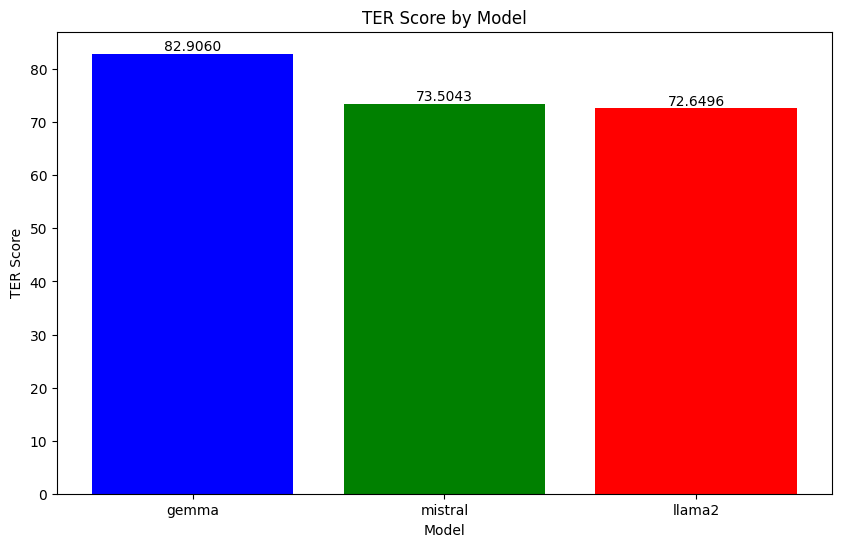

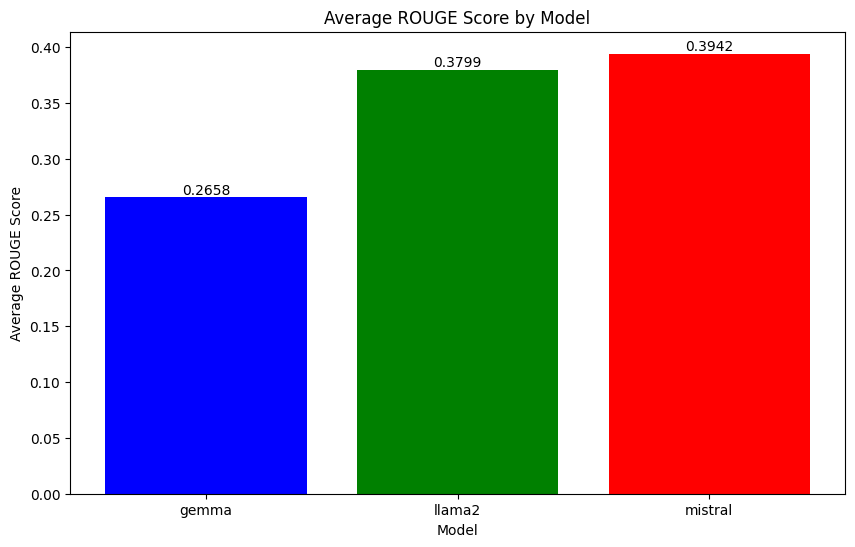

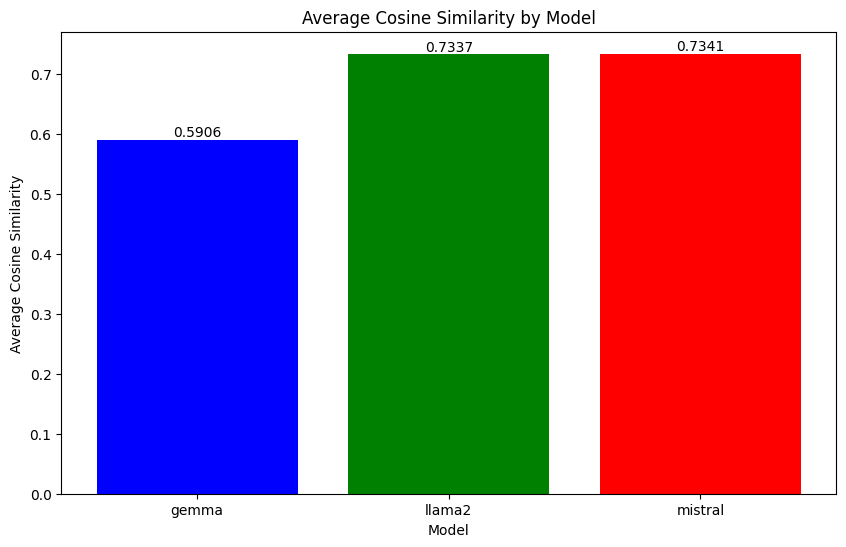

In [36]:
GPT4_reference = "The Battle of the Boyne, fought on July 1, 1690, near the River Boyne in Ireland, was a pivotal moment in Irish, British, and European history. This conflict was between the deposed King James II of England and Scotland, who had the support of Catholic France, and the Dutch Prince William of Orange, who had ascended to the English throne. William's victory ensured the continued Protestant ascendancy in Ireland. The battle is celebrated for its impact on maintaining Protestant power in England and has deep cultural significance, particularly in Northern Ireland, symbolizing the triumph of Protestantism. Engaging thousands of troops, it was more than a mere military engagement; it shaped the course of British and Irish history."


import time
from llama_index.llms.ollama import Ollama
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Responses dictionary to store model responses
responses_Boyne = {}

# Metrics dictionary to store all the metrics
metrics3C_Boyne = {}

# Experiments list detailing the models and the question
experiments = [
    {'experiment_number': 1, 'model_choice': 'llama2', 'question': "Tell me about the battle of Boyne in 100 words"},
    {'experiment_number': 1, 'model_choice': 'mistral', 'question': "Tell me about the battle of Boyne in 100 words"},
    {'experiment_number': 1, 'model_choice': 'gemma', 'question': "Tell me about the battle of Boyne in 100 words"},
]

print(f"The question: {experiments[1]['question']}\n")

# Processing each experiment
for experiment in experiments:
    llm = Ollama(model=experiment['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = llm.complete(experiment['question'])
    end_time = time.time()

    response_key = f"Response_experiment{experiment['experiment_number']}_{experiment['model_choice']}"
    responses_Boyne[response_key] = response.text
    

# Reference responses for evaluation
reference_responses = [
    "The Battle of the Boyne, fought on July 1, 1690, near the River Boyne in Ireland, was a pivotal moment in Irish, British, and European history. This conflict was between the deposed King James II of England and Scotland, who had the support of Catholic France, and the Dutch Prince William of Orange, who had ascended to the English throne. William's victory ensured the continued Protestant ascendancy in Ireland. The battle is celebrated for its impact on maintaining Protestant power in England and has deep cultural significance, particularly in Northern Ireland, symbolizing the triumph of Protestantism. Engaging thousands of troops, it was more than a mere military engagement; it shaped the course of British and Irish history."
]


# Evaluation of NLP metrics for each response
for key, llm_response in responses_Boyne.items():
    # Initialize a nested dictionary for this response
    metrics3C_Boyne[key] = {}
    
    # Calculate BLEU score
    bleu_score = sentence_bleu([ref.split() for ref in reference_responses], llm_response.split())
    metrics3C_Boyne[key]['BLEU Score'] = bleu_score

    # Calculate ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference_responses[0], llm_response)
    metrics3C_Boyne[key]['ROUGE Scores'] = rouge_score

    # Calculate TER score
    ter_score = corpus_ter([llm_response], [[ref] for ref in reference_responses]).score
    metrics3C_Boyne[key]['TER Score'] = ter_score

    # Calculate Cosine Similarities
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response] + reference_responses)
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics3C_Boyne[key]['Cosine Similarities'] = cosine_similarities.flatten()
    
    print(f"Metrics for {key}:")
    print(f"BLEU Score: {bleu_score}")
    print(f"ROUGE Scores: {rouge_score}")
    print(f"TER Score: {ter_score}")
    print(f"Cosine Similarities: {cosine_similarities.flatten()}\n")

# Extracting and preparing data for visualization
visualization_data = {
    'BLEU Score': {},
    'TER Score': {},
    'Average ROUGE Score': {},
    'Average Cosine Similarity': {}
}

for key, values in metrics3C_Boyne.items():
    model_name = key.split('_')[-1]  # Extracting model name from the key
    visualization_data['BLEU Score'][model_name] = values['BLEU Score']
    visualization_data['TER Score'][model_name] = values['TER Score']
    # Calculating average ROUGE score 
    average_rouge_score_Boyne = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])
    visualization_data['Average ROUGE Score'][model_name] = average_rouge_score_Boyne
    # Average Cosine Similarity
    average_cosine_similarity_Boyne = np.mean(values['Cosine Similarities'])
    visualization_data['Average Cosine Similarity'][model_name] = average_cosine_similarity_Boyne


def plot_results(metric_name, results_dict, ascending=True):
    # Sort results based on value
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=not ascending)
    
    models = [x[0] for x in sorted_results]
    scores = [x[1] for x in sorted_results]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=['blue', 'green', 'red'])
    plt.title(f'{metric_name} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(models)
    
    # Show the exact value on top of each bar
    for i, score in enumerate(scores):
        plt.text(i, score, f"{score:.4f}", ha = 'center', va = 'bottom')

    plt.show()

# Plot each metric
for metric_name, results_dict in visualization_data.items():
    if metric_name == 'TER Score':
        plot_results(metric_name, results_dict, ascending=False)  # Lower TER Score is better, hence reverse sorting
    else:
        plot_results(metric_name, results_dict)



In [37]:
responses_Boyne["Response_experiment1_llama2"]


"\nThe Battle of the Boyne was a pivotal conflict fought on July 1, 1690 between the forces of King James II of England and Ireland, and his nephew and rival, William III of Orange. The battle took place near Drogheda, Ireland and resulted in a decisive victory for William, who captured Dublin and restored Protestantism to the region. The battle is significant in British history as it marked the end of Catholic hopes for a restored Stuart monarchy and cemented William's position as the main leader of the Protestant powers in Europe."

In [38]:
responses_Boyne["Response_experiment1_mistral"]


" The Battle of the Boyne took place on July 1, 1690, near the River Boyne in Ireland. It was a pivotal moment in Irish and British history as it decisively ended the Jacobite threat to English rule in Ireland and marked the failure of James II's attempt to regain the English throne after his defeat in the Battle of the Dunes (1689). The battle saw the Protestant King William III of England, jointly with his Dutch allies, defeat the larger Catholic forces led by James II. The victory ensured the continued dominance of Protestant rule and Anglo-Irish relations for centuries to come."

In [39]:
responses_Boyne["Response_experiment1_gemma"]

"The Battle of Boyne on July 1, 1690, was a significant clash between the armies of the Holy League and the Irish rebels. The Holy League, comprising forces from Spain, France, and the Netherlands, aimed to suppress Irish resistance to English rule. The Irish rebels, led by Hugh O'Connell, fought to protect their independence. The battle resulted in a victory for the Holy League, but the Irish rebels managed to maintain their control over most of the country. The battle marked a turning point in Irish history, as it signaled the decline of Irish resistance and the eventual establishment of English dominance."

# Battle of Hastings 

The question: Tell me about the battle of Hastings which took place in 1066AD in 100 words



/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Metrics for Response_experiment3_llama2:
BLEU Score: 2.2622807784169627e-78
ROUGE Scores: {'rouge1': Score(precision=0.6753246753246753, recall=0.45217391304347826, fmeasure=0.5416666666666666), 'rouge2': Score(precision=0.2631578947368421, recall=0.17543859649122806, fmeasure=0.21052631578947367), 'rougeL': Score(precision=0.37662337662337664, recall=0.25217391304347825, fmeasure=0.3020833333333333)}
TER Score: 77.98165137614679
Cosine Similarities: [0.68472559]

Metrics for Response_experiment3_mistral:
BLEU Score: 0.1863300129525415
ROUGE Scores: {'rouge1': Score(precision=0.5271317829457365, recall=0.591304347826087, fmeasure=0.5573770491803278), 'rouge2': Score(precision=0.2890625, recall=0.32456140350877194, fmeasure=0.30578512396694213), 'rougeL': Score(precision=0.3798449612403101, recall=0.4260869565217391, fmeasure=0.4016393442622951)}
TER Score: 81.65137614678899
Cosine Similarities: [0.6863384]

Metrics for Response_experiment3_gemma:
BLEU Score: 0.1301344992577038
ROUGE Sc

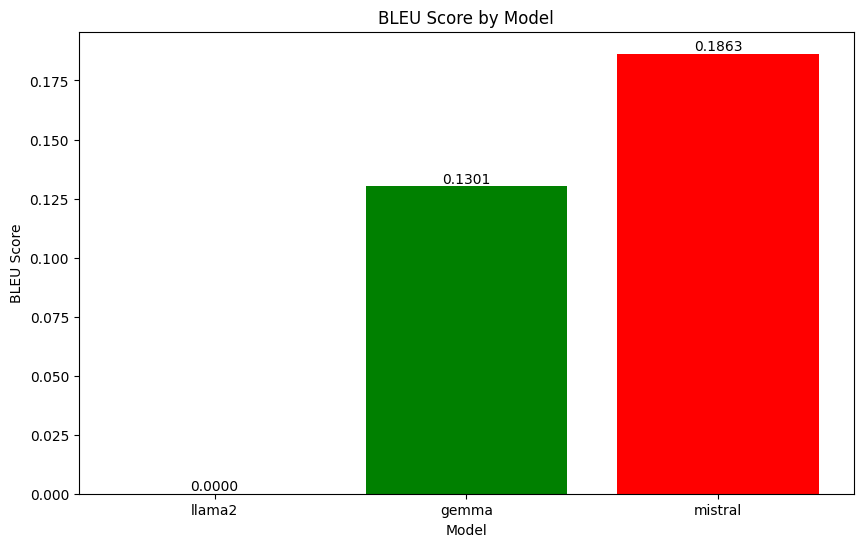

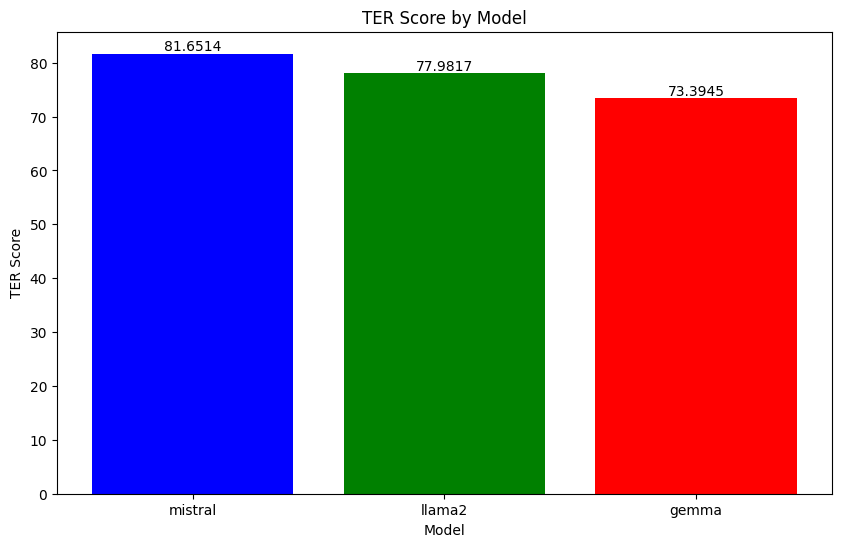

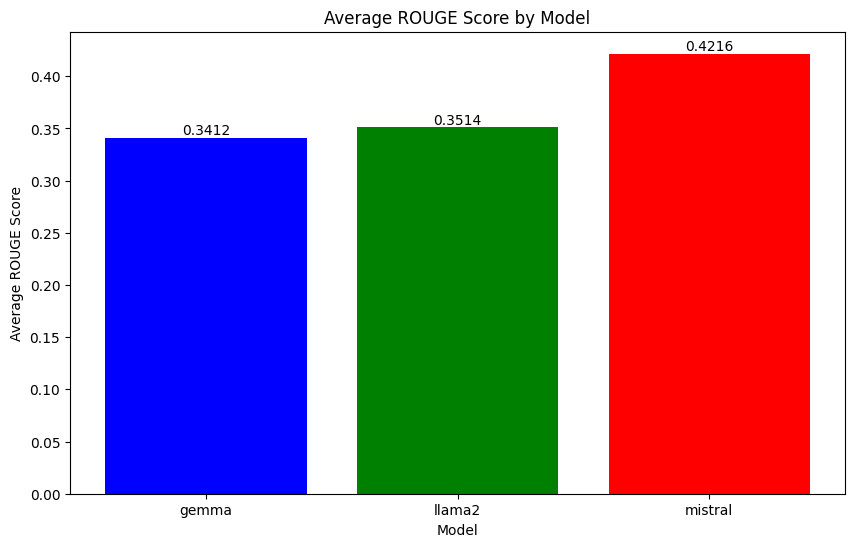

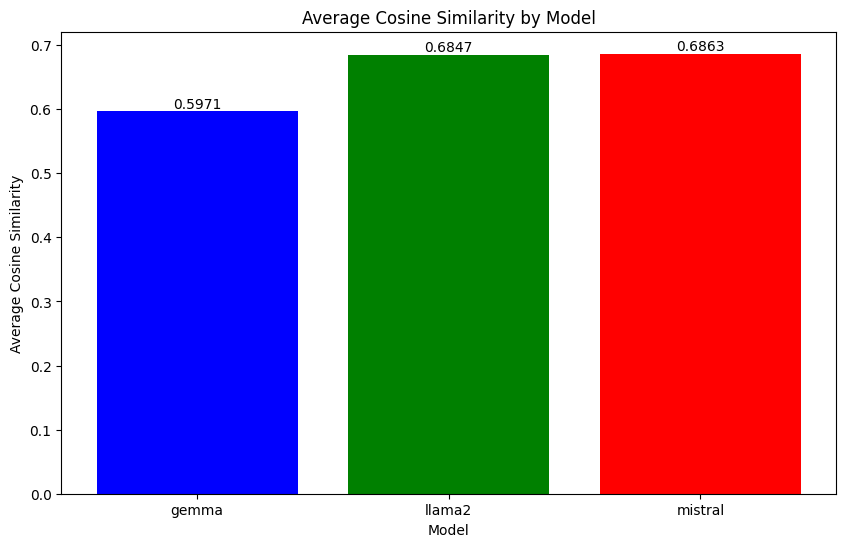

In [40]:
import time
from llama_index.llms.ollama import Ollama
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Responses dictionary to store model responses
responses_Hastings = {}

# Metrics dictionary to store all the metrics
metrics3C_Hastings = {}

# Experiments list detailing the models and the question
experiments = [
    {'experiment_number': 3, 'model_choice': 'llama2', 'question': "Tell me about the battle of Hastings which took place in 1066AD in 100 words"},
    {'experiment_number': 3, 'model_choice': 'mistral', 'question': "Tell me about the battle of Hastings which took place in 1066AD in 100 words"},
    {'experiment_number': 3, 'model_choice': 'gemma', 'question': "Tell me about the battle of Hastings which took place in 1066AD in 100 words"},
]

print(f"The question: {experiments[1]['question']}\n")

# Processing each experiment
for experiment in experiments:
    llm = Ollama(model=experiment['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = llm.complete(experiment['question'])
    end_time = time.time()

    response_key = f"Response_experiment{experiment['experiment_number']}_{experiment['model_choice']}"
    responses_Hastings[response_key] = response.text
    

# Reference responses for evaluation
reference_responses = [
    "The Battle of Hastings, fought on October 14, 1066, was a pivotal moment in English history. It took place between the Norman-French army of William, the Duke of Normandy, and an English army under the Anglo-Saxon King Harold Godwinson, who had been crowned king earlier that year. The battle occurred because William claimed the English throne, asserting that Harold had previously sworn to support his claim. The conflict saw Harold's forces defeated after a day-long fight. Harold was killed, leading to William's ascension to the English throne, subsequently known as William the Conqueror. This victory initiated the Norman conquest of England, profoundly altering the country's culture, language, and governance."
]


# Evaluation of NLP metrics for each response
for key, llm_response in responses_Hastings.items():
    # Initialize a nested dictionary for this response
    metrics3C_Hastings[key] = {}
    
    # Calculate BLEU score
    bleu_score = sentence_bleu([ref.split() for ref in reference_responses], llm_response.split())
    metrics3C_Hastings[key]['BLEU Score'] = bleu_score

    # Calculate ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference_responses[0], llm_response)
    metrics3C_Hastings[key]['ROUGE Scores'] = rouge_score

    # Calculate TER score
    ter_score = corpus_ter([llm_response], [[ref] for ref in reference_responses]).score
    metrics3C_Hastings[key]['TER Score'] = ter_score

    # Calculate Cosine Similarities
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response] + reference_responses)
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics3C_Hastings[key]['Cosine Similarities'] = cosine_similarities.flatten()
    
    print(f"Metrics for {key}:")
    print(f"BLEU Score: {bleu_score}")
    print(f"ROUGE Scores: {rouge_score}")
    print(f"TER Score: {ter_score}")
    print(f"Cosine Similarities: {cosine_similarities.flatten()}\n")

# Extracting and preparing data for visualization
visualization_data = {
    'BLEU Score': {},
    'TER Score': {},
    'Average ROUGE Score': {},
    'Average Cosine Similarity': {}
}

for key, values in metrics3C_Hastings.items():
    model_name = key.split('_')[-1]  # Extracting model name from the key
    visualization_data['BLEU Score'][model_name] = values['BLEU Score']
    visualization_data['TER Score'][model_name] = values['TER Score']
    # Calculating average ROUGE score 
    average_rouge_score_Hastings = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])
    visualization_data['Average ROUGE Score'][model_name] = average_rouge_score_Hastings
    # Average Cosine Similarity
    average_cosine_similarity_Hastings = np.mean(values['Cosine Similarities'])
    visualization_data['Average Cosine Similarity'][model_name] = average_cosine_similarity_Hastings


def plot_results(metric_name, results_dict, ascending=True):
    # Sort results based on value
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=not ascending)
    
    models = [x[0] for x in sorted_results]
    scores = [x[1] for x in sorted_results]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=['blue', 'green', 'red'])
    plt.title(f'{metric_name} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(models)
    
    # Show the exact value on top of each bar
    for i, score in enumerate(scores):
        plt.text(i, score, f"{score:.4f}", ha = 'center', va = 'bottom')

    plt.show()

# Plot each metric
for metric_name, results_dict in visualization_data.items():
    if metric_name == 'TER Score':
        plot_results(metric_name, results_dict, ascending=False)  # Lower TER Score is better, hence reverse sorting
    else:
        plot_results(metric_name, results_dict)



# battle of Waterloo

The question: Tell me about the battle of Waterloo in 100 words

Metrics for Response_experiment2_llama2:
BLEU Score: 0.08176269321928697
ROUGE Scores: {'rouge1': Score(precision=0.648936170212766, recall=0.5083333333333333, fmeasure=0.5700934579439252), 'rouge2': Score(precision=0.22580645161290322, recall=0.17647058823529413, fmeasure=0.19811320754716982), 'rougeL': Score(precision=0.40425531914893614, recall=0.31666666666666665, fmeasure=0.35514018691588783)}
TER Score: 71.9298245614035
Cosine Similarities: [0.68054412]

Metrics for Response_experiment2_mistral:
BLEU Score: 0.16600825796749719
ROUGE Scores: {'rouge1': Score(precision=0.5585585585585585, recall=0.5166666666666667, fmeasure=0.5367965367965368), 'rouge2': Score(precision=0.2636363636363636, recall=0.24369747899159663, fmeasure=0.25327510917030566), 'rougeL': Score(precision=0.3153153153153153, recall=0.2916666666666667, fmeasure=0.3030303030303031)}
TER Score: 81.57894736842105
Cosine Similarities: [0.68021978]

Metric

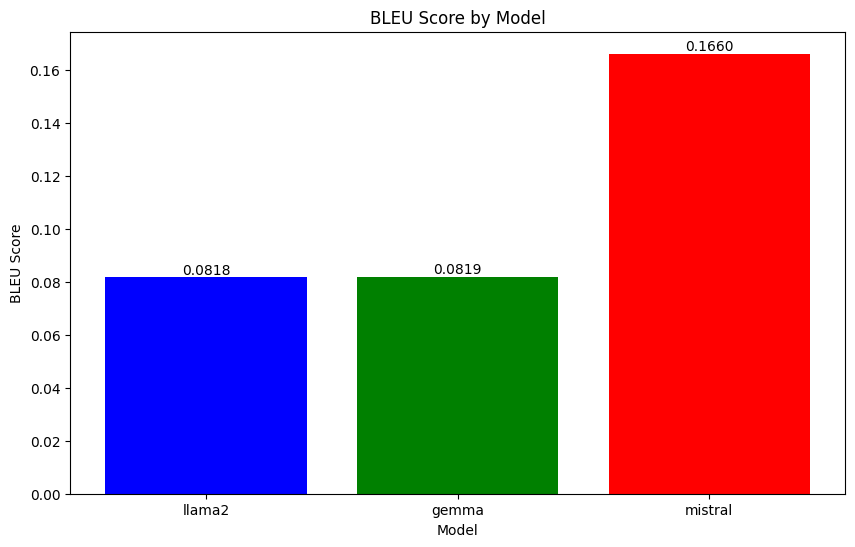

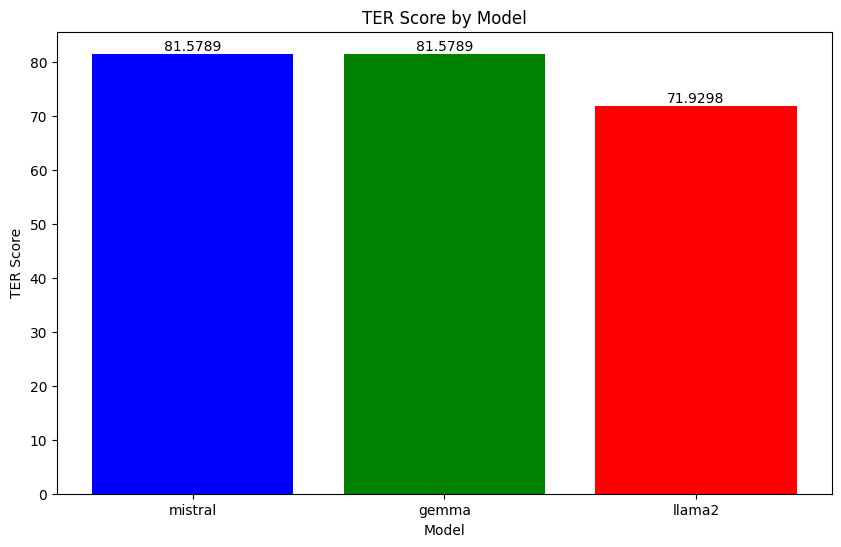

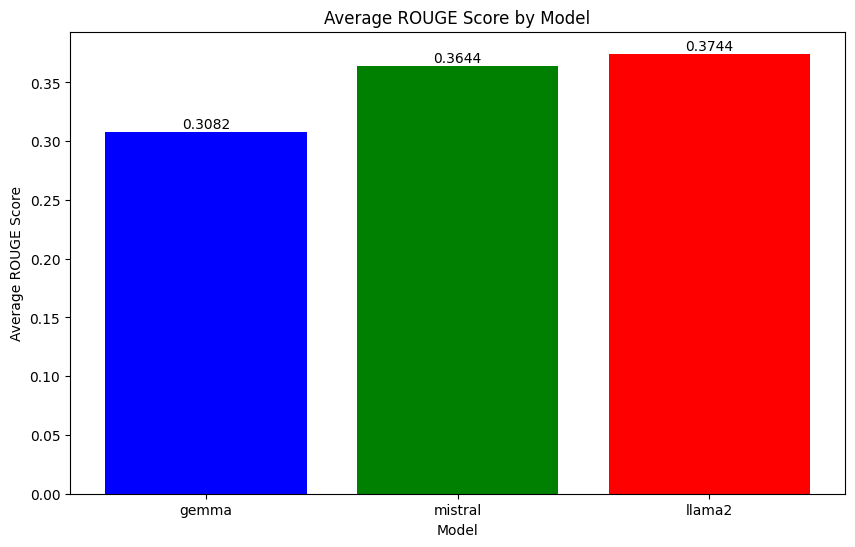

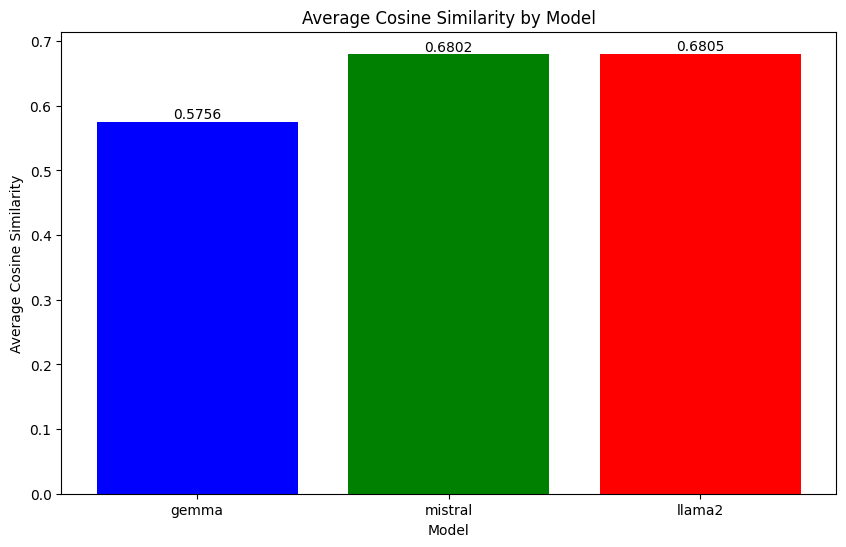

In [41]:
import time
from llama_index.llms.ollama import Ollama
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Responses dictionary to store model responses
responses_Waterloo = {}

# Metrics dictionary to store all the metrics
metrics3C_Waterloo = {}

# Experiments list detailing the models and the question
experiments = [
    {'experiment_number': 2, 'model_choice': 'llama2', 'question': "Tell me about the battle of Waterloo in 100 words"},
    {'experiment_number': 2, 'model_choice': 'mistral', 'question': "Tell me about the battle of Waterloo in 100 words"},
    {'experiment_number': 2, 'model_choice': 'gemma', 'question': "Tell me about the battle of Waterloo in 100 words"},
]

print(f"The question: {experiments[1]['question']}\n")

# Processing each experiment
for experiment in experiments:
    llm = Ollama(model=experiment['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = llm.complete(experiment['question'])
    end_time = time.time()

    response_key = f"Response_experiment{experiment['experiment_number']}_{experiment['model_choice']}"
    responses_Waterloo[response_key] = response.text
    

# Reference responses for evaluation
reference_responses = [
    "The Battle of Waterloo, fought on June 18, 1815, near Waterloo in present-day Belgium, marked the end of Napoleon Bonaparte's rule as Emperor of the French and his Hundred Days' return from exile. This decisive battle involved the French army under Napoleon and two armies of the Seventh Coalition: a British-led allied army under the Duke of Wellington and a Prussian army under Gebhard Leberecht von Blücher. Despite initial successes, Napoleon's forces were overwhelmed by the coalition armies' superior numbers and coordination. The defeat at Waterloo led to Napoleon's abdication and exile to Saint Helena, where he died in 1821. Waterloo ended 23 years of recurrent warfare between France and other powers in Europe."
]


# Evaluation of NLP metrics for each response
for key, llm_response in responses_Waterloo.items():
    # Initialize a nested dictionary for this response
    metrics3C_Waterloo[key] = {}
    
    # Calculate BLEU score
    bleu_score = sentence_bleu([ref.split() for ref in reference_responses], llm_response.split())
    metrics3C_Waterloo[key]['BLEU Score'] = bleu_score

    # Calculate ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference_responses[0], llm_response)
    metrics3C_Waterloo[key]['ROUGE Scores'] = rouge_score

    # Calculate TER score
    ter_score = corpus_ter([llm_response], [[ref] for ref in reference_responses]).score
    metrics3C_Waterloo[key]['TER Score'] = ter_score

    # Calculate Cosine Similarities
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response] + reference_responses)
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics3C_Waterloo[key]['Cosine Similarities'] = cosine_similarities.flatten()
    
    print(f"Metrics for {key}:")
    print(f"BLEU Score: {bleu_score}")
    print(f"ROUGE Scores: {rouge_score}")
    print(f"TER Score: {ter_score}")
    print(f"Cosine Similarities: {cosine_similarities.flatten()}\n")

# Extracting and preparing data for visualization
visualization_data = {
    'BLEU Score': {},
    'TER Score': {},
    'Average ROUGE Score': {},
    'Average Cosine Similarity': {}
}

for key, values in metrics3C_Waterloo.items():
    model_name = key.split('_')[-1]  # Extracting model name from the key
    visualization_data['BLEU Score'][model_name] = values['BLEU Score']
    visualization_data['TER Score'][model_name] = values['TER Score']
    # Calculating average ROUGE score 
    average_rouge_score_Waterloo_{model_name} = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])
    visualization_data['Average ROUGE Score'][model_name] = average_rouge_score_Waterloo
    # Average Cosine Similarity
    average_cosine_similarity_Waterloo = np.mean(values['Cosine Similarities'])
    visualization_data['Average Cosine Similarity'][model_name] = average_cosine_similarity_Waterloo


def plot_results(metric_name, results_dict, ascending=True):
    # Sort results based on value
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=not ascending)
    
    models = [x[0] for x in sorted_results]
    scores = [x[1] for x in sorted_results]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=['blue', 'green', 'red'])
    plt.title(f'{metric_name} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(models)
    
    # Show the exact value on top of each bar
    for i, score in enumerate(scores):
        plt.text(i, score, f"{score:.4f}", ha = 'center', va = 'bottom')

    plt.show()

# Plot each metric
for metric_name, results_dict in visualization_data.items():
    if metric_name == 'TER Score':
        plot_results(metric_name, results_dict, ascending=False)  # Lower TER Score is better, hence reverse sorting
    else:
        plot_results(metric_name, results_dict)



# Response bodies 

In [42]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)
response_data = []

# Adding responses from each battle into the data for DataFrame
for model, response in responses_Boyne.items():
    response_data.append({'Model': model, 'Battle': 'Boyne', 'Response': response})

for model, response in responses_Hastings.items():
    response_data.append({'Model': model, 'Battle': 'Hastings', 'Response': response})

for model, response in responses_Waterloo.items():
    response_data.append({'Model': model, 'Battle': 'Waterloo', 'Response': response})

# Creating the DataFrame
response_df = pd.DataFrame(response_data)

# Display the table of responses
response_df

,Model,Battle,Response
0,Response_experiment1_llama2,Boyne,"\nThe Battle of the Boyne was a pivotal conflict fought on July 1, 1690 between the forces of King James II of England and Ireland, and his nephew and rival, William III of Orange. The battle took place near Drogheda, Ireland and resulted in a decisive victory for William, who captured Dublin and restored Protestantism to the region. The battle is significant in British history as it marked the end of Catholic hopes for a restored Stuart monarchy and cemented William's position as the main leader of the Protestant powers in Europe."
1,Response_experiment1_mistral,Boyne,"The Battle of the Boyne took place on July 1, 1690, near the River Boyne in Ireland. It was a pivotal moment in Irish and British history as it decisively ended the Jacobite threat to English rule in Ireland and marked the failure of James II's attempt to regain the English throne after his defeat in the Battle of the Dunes (1689). The battle saw the Protestant King William III of England, jointly with his Dutch allies, defeat the larger Catholic forces led by James II. The victory ensured the continued dominance of Protestant rule and Anglo-Irish relations for centuries to come."
2,Response_experiment1_gemma,Boyne,"The Battle of Boyne on July 1, 1690, was a significant clash between the armies of the Holy League and the Irish rebels. The Holy League, comprising forces from Spain, France, and the Netherlands, aimed to suppress Irish resistance to English rule. The Irish rebels, led by Hugh O'Connell, fought to protect their independence. The battle resulted in a victory for the Holy League, but the Irish rebels managed to maintain their control over most of the country. The battle marked a turning point in Irish history, as it signaled the decline of Irish resistance and the eventual establishment of English dominance."
3,Response_experiment3_llama2,Hastings,"\nThe Battle of Hastings was a pivotal event in English history that took place on October 14, 1066. Duke William of Normandy defeated King Harold II's army, leading to the Norman Conquest of England. The battle was fought near Hastings, England, and resulted in the death of King Harold and many of his soldiers. The victory allowed Duke William to become the new king of England, marking the beginning of a new era in English history."
4,Response_experiment3_mistral,Hastings,"The Battle of Hastings, fought on October 14, 1066 AD, was a decisive encounter between the Norman-French army of William, Duke of Normandy, and the Anglo-Saxon English army led by King Harold Godwinson. The battle took place near Hastings in East Sussex, England.\n\nHarold's army was initially successful, but their morale waned when Harold was fatally wounded. With renewed vigor, William's forces charged and eventually overran the English line. Thousands were killed or wounded, and many Anglo-Saxon nobles fled or were captured.\n\nWilliam's victory led to his eventual ascension to the English throne, marking the end of Anglo-Saxon rule and the beginning of the Norman Conquest. The battle significantly influenced the cultural, linguistic, and political landscape of England for centuries to come."
5,Response_experiment3_gemma,Hastings,"The Battle of Hastings, fought on October 14, 1066, was a pivotal battle in English history. Norman forces, led by William the Conqueror, clashed with the Anglo-Saxon army, led by King Edward the Confessor. The Norman victory marked the end of Anglo-Saxon rule and the beginning of Norman domination in England. William's triumph established him as the first Norman king of England, paving the way for centuries of Norman rule."
6,Response_experiment2_llama2,Waterloo,"\nThe Battle of Waterloo was fought on June 18, 1815, between the forces of Napoleon Bonaparte and a coalition of British and Prussian troops. The French army was victorious in the early stages of the battle, but the arrival of the Prussian army led by Gebhard von Blücher turned the tide

In [46]:
metrics3C_Boyne

{'Response_experiment1_llama2': {'BLEU Score': 0.12386004243528552,
  'ROUGE Scores': {'rouge1': Score(precision=0.6559139784946236, recall=0.5169491525423728, fmeasure=0.5781990521327014),
   'rouge2': Score(precision=0.2608695652173913, recall=0.20512820512820512, fmeasure=0.22966507177033493),
   'rougeL': Score(precision=0.3763440860215054, recall=0.2966101694915254, fmeasure=0.33175355450236965)},
  'TER Score': 72.64957264957265,
  'Cosine Similarities': array([0.73370723])},
 'Response_experiment1_mistral': {'BLEU Score': 0.17066708838289743,
  'ROUGE Scores': {'rouge1': Score(precision=0.5961538461538461, recall=0.5254237288135594, fmeasure=0.5585585585585586),
   'rouge2': Score(precision=0.27184466019417475, recall=0.23931623931623933, fmeasure=0.2545454545454545),
   'rougeL': Score(precision=0.3942307692307692, recall=0.3474576271186441, fmeasure=0.3693693693693693)},
  'TER Score': 73.50427350427351,
  'Cosine Similarities': array([0.73412184])},
 'Response_experiment1_gem

In [ ]:
average_rouge_score_Hastings = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])


## Score progression 

KeyError: 'Average ROUGE Score'

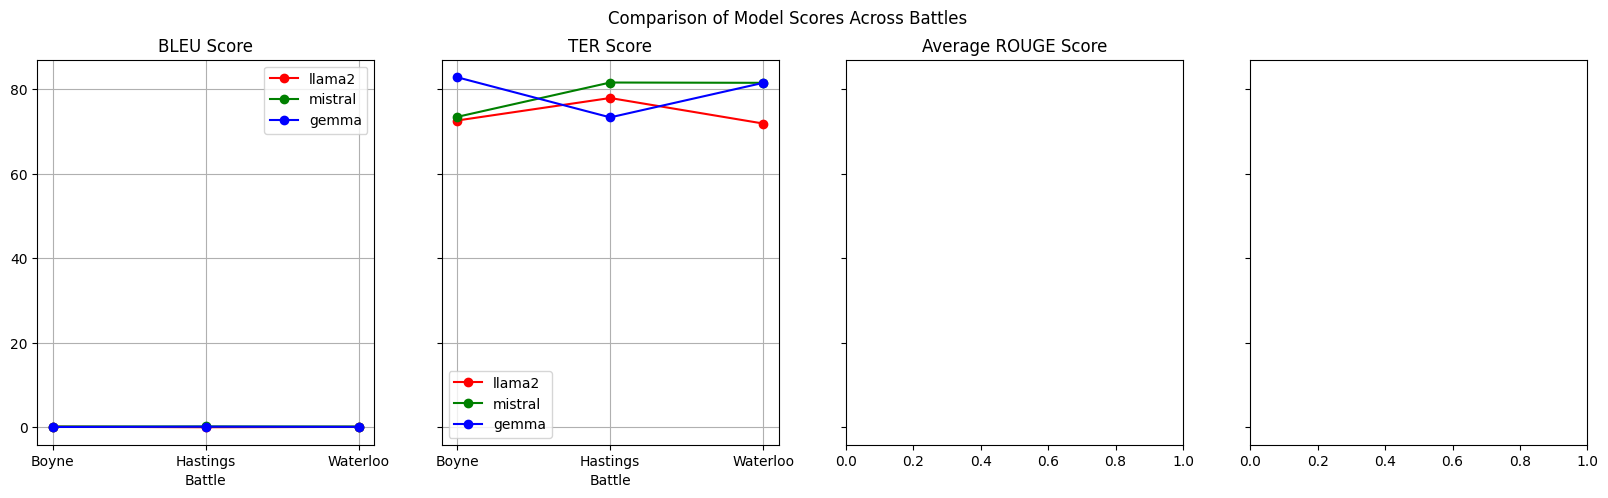

In [44]:

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
battles = ['Boyne', 'Hastings', 'Waterloo']
metrics = ['BLEU Score', 'TER Score', 'Average ROUGE Score', 'Average Cosine Similarity']
models = ['llama2', 'mistral', 'gemma']
colors = ['red', 'green', 'blue']  # Colors for each model

# Create a 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Comparison of Model Scores Across Battles')

# Loop through each metric to plot
for idx, metric in enumerate(metrics):
    ax = axs[idx]
    ax.set_title(metric)
    
    for model_idx, model in enumerate(models):
        scores = []
        for battle in battles:
            if battle == 'Boyne':
                score = metrics3C_Boyne[f'Response_experiment1_{model}'][metric]
            elif battle == 'Hastings':
                score = metrics3C_Hastings[f'Response_experiment3_{model}'][metric]
            else:  # Waterloo
                score = metrics3C_Waterloo[f'Response_experiment2_{model}'][metric]
            
            # For demonstration, assuming Average ROUGE Score directly provided
            scores.append(score)
        
        ax.plot(battles, scores, label=model, color=colors[model_idx], marker='o')
    ax.legend()
    ax.set_xlabel('Battle')
    ax.grid(True)

plt.tight_layout()
plt.show()


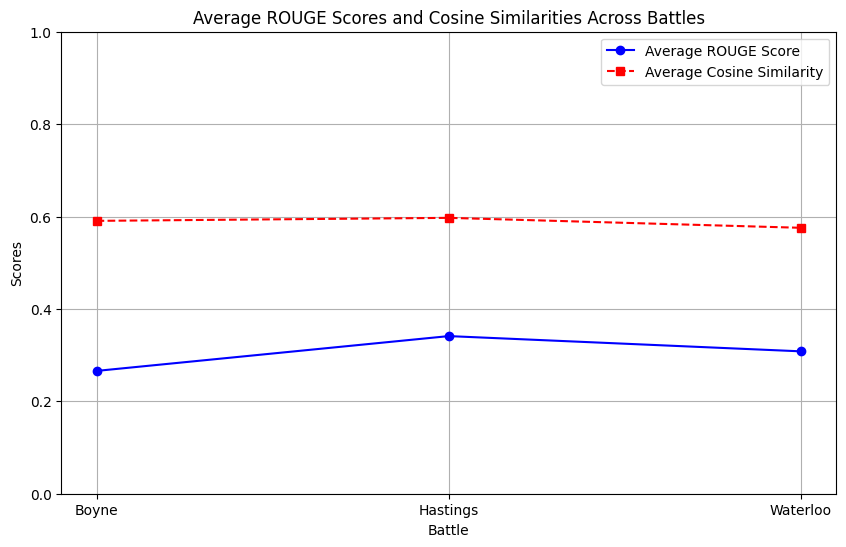

In [45]:
# Assuming the average ROUGE and cosine similarity scores have been calculated as shown in previous steps
# Plotting these averages for each battle for visual comparison

import matplotlib.pyplot as plt

battles = ['Boyne', 'Hastings', 'Waterloo']

# Setting up the plot
plt.figure(figsize=(10, 6))

average_rouge_scores = [average_rouge_score_Boyne, average_rouge_score_Hastings, average_rouge_score_Waterloo]
average_cosine_similarities = [average_cosine_similarity_Boyne, average_cosine_similarity_Hastings, average_cosine_similarity_Waterloo]


# Plotting Average ROUGE Scores
plt.plot(battles, average_rouge_scores, label='Average ROUGE Score', marker='o', linestyle='-', color='blue')

# Plotting Average Cosine Similarities
plt.plot(battles, average_cosine_similarities, label='Average Cosine Similarity', marker='s', linestyle='--', color='red')

# Adding titles and labels
plt.title('Average ROUGE Scores and Cosine Similarities Across Battles')
plt.xlabel('Battle')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Assuming scores are normalized between 0 and 1

# Adding legend
plt.legend()

# Showing the plotn
plt.grid(True)
plt.show()
